In [1]:
from sklearn import tree
import pandas as pd

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
columns = [
    "num_pregnant",
    "plasma_glucose",
    "diastolic_bp",
    "triceps_skin_fold_thickness",
    "2_hour_serum_insulin",
    "bmi",
    "diabetes_pedigree_func",
    "age",
    "diabetes"]
df = pd.read_csv(url, names=columns)
df.head()

,num_pregnant,plasma_glucose,diastolic_bp,triceps_skin_fold_thickness,2_hour_serum_insulin,bmi,diabetes_pedigree_func,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
target = df["diabetes"]
target_names = ["negative", "positive"]

In [4]:
data = df.drop("diabetes", axis=1)
feature_names = data.columns
data.head()

,num_pregnant,plasma_glucose,diastolic_bp,triceps_skin_fold_thickness,2_hour_serum_insulin,bmi,diabetes_pedigree_func,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.69791666666666663

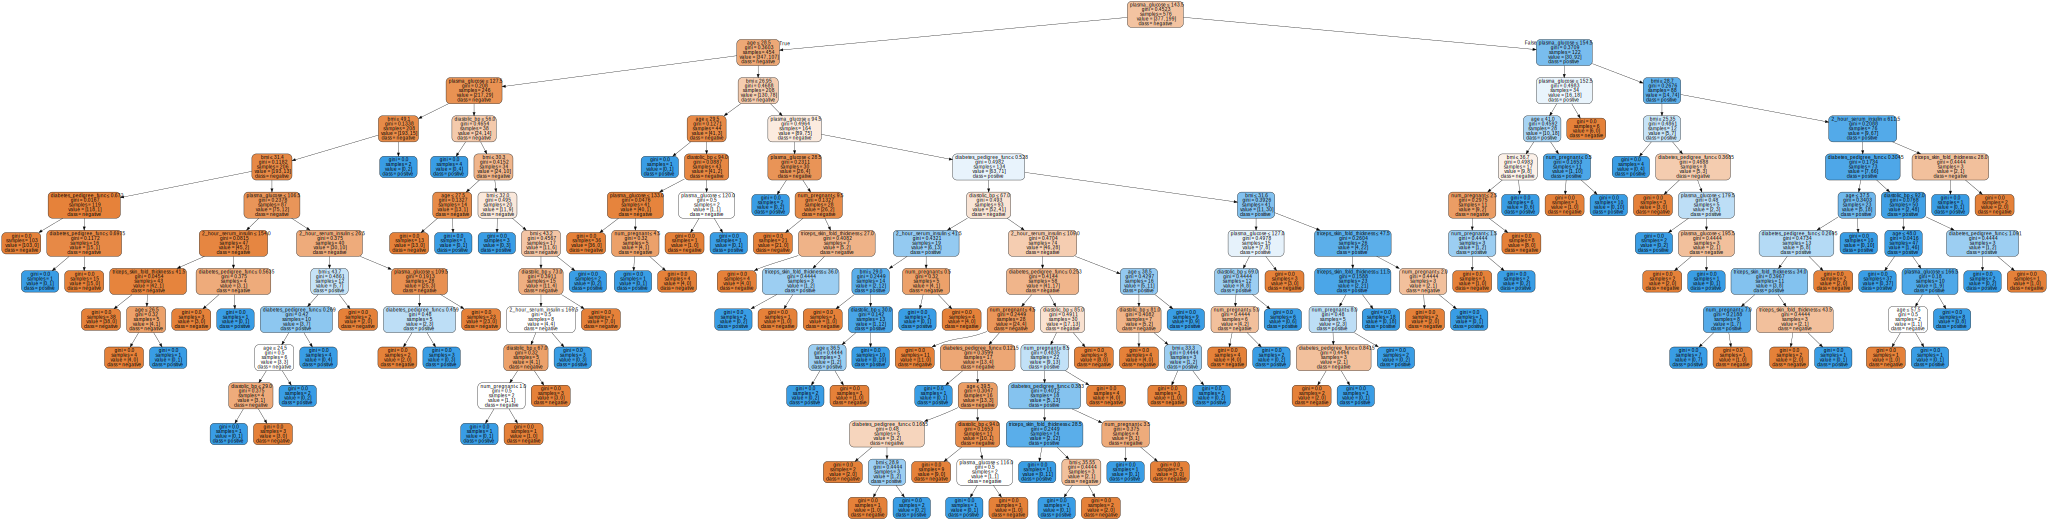

In [7]:
# WARNING! BOILERPLATE CODE HERE! 
# Use this to visualize the tree
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.74479166666666663